In [22]:
print("Hello World")

Hello World


In [231]:

### Import all necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.datasets import load_iris
import scipy.stats as stats


### Display all rows of data for comprehensive view
pd.set_option('display.max_rows', None)

### Read dataset on Swedish breast cancer incidence
Data_ASR_SW = pd.read_csv(r'C:\Users\emile\Documents\BEP\Data ASR NL SW.csv', sep=",", header = 0)
### Rename Columns
Data_ASR_SW = Data_ASR_SW.loc[1:81, ["Country label",'Year', "ASR (World)"]]
mapping = {Data_ASR_SW.columns[0]:'Country Label', Data_ASR_SW.columns[1]: 'Year', Data_ASR_SW.columns[2]:'ASR (World) Value'} 
Data_ASR_SW = Data_ASR_SW.rename(columns=mapping) 
### Only data on Sweden
Data_ASR_SW = Data_ASR_SW[Data_ASR_SW["Country Label"] == "Sweden"]

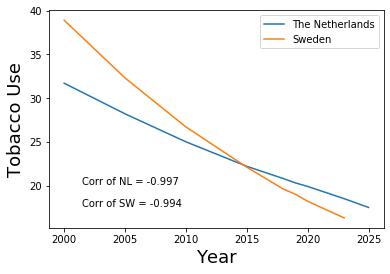

In [232]:
### Read dataset on Tobacco Use
Data_Smoking = pd.read_csv(r'C:\Users\emile\Documents\BEP\Data Smoking NL SW.csv', sep=",")
### Data only on women, and renaming columns
Data_Smoking = Data_Smoking[Data_Smoking["Dim1"] == "Female"]
Data_Smoking = Data_Smoking.loc[1:53, ["Location", "Period" ,"Value"]]
Data_Smoking.rename(columns={'Country Label': 'Location', "Year": "Period"}, inplace = True)
mapping = {Data_Smoking.columns[0]:'Country Label', Data_Smoking.columns[1]: 'Year', Data_Smoking.columns[2]:'Smoking Value'} 
Data_Smoking = Data_Smoking.rename(columns=mapping)
Data_Smoking.sort_values(by=["Country Label", "Year"])
Data_Smoking=Data_Smoking.replace({"Netherlands" : "The Netherlands"})

### Splitting data per country
Data_Smoking_NL = Data_Smoking[Data_Smoking["Country Label"] == "The Netherlands"]
Data_Smoking_SW = Data_Smoking[Data_Smoking["Country Label"] == "Sweden"]

### Calculating Corr Coefficients
r_NL, p = stats.pearsonr(Data_Smoking_NL["Year"], Data_Smoking_NL["Smoking Value"])
r_SW, p = stats.pearsonr(Data_Smoking_SW["Year"], Data_Smoking_SW["Smoking Value"])

### Plotting graph for Appendix A
plt.plot(Data_Smoking_NL["Year"], Data_Smoking_NL["Smoking Value"])
plt.plot(Data_Smoking_SW["Year"], Data_Smoking_SW["Smoking Value"])
plt.xlabel('Year', fontsize=18)
plt.ylabel('Tobacco Use', fontsize=18)
plt.annotate('Corr of NL = {:.3f}'.format(r_NL), xy=(0.1, 0.2), xycoords='axes fraction')
plt.annotate('Corr of SW = {:.3f}'.format(r_SW), xy=(0.1, 0.1), xycoords='axes fraction')
plt.gca().legend(("The Netherlands", "Sweden"))
plt.show()



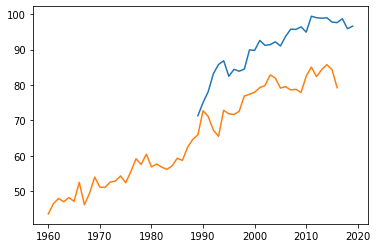

In [233]:
### Read dataset on Dutch breast cancer incidence
Data_ASR_NL=pd.read_csv(r"C:\Users\emile\Documents\BEP\Data ASR NL 2.csv", sep=",", header = 0)

### Rename Columns
mapping = {Data_ASR_NL.columns[0]:'Year', Data_ASR_NL.columns[1]: 'ASR (World) Value'} 
Data_ASR_NL = Data_ASR_NL.rename(columns=mapping)

Land = []
for i in range(31):
    Land.append("The Netherlands")

Data_ASR_NL.insert(0, 'Country Label', Land)

### Removing Semicolons in dataset
def remove_semicolons(lst):
    result = []
    for item in lst:
        if isinstance(item, str):
            item = re.sub(r'\;;;\$', '', item)
        result.append(item)
    return result

list_without_semicolons = [item.replace(';', '') for item in Data_ASR_NL["ASR (World) Value"]]

res = [float(i) for i in list_without_semicolons]
Data_ASR_NL["ASR (World) Value"] = res


### Merging and plotting ASR data
Data_ASR_ALL = pd.concat([Data_ASR_NL, Data_ASR_SW], ignore_index=True)
plt.plot(Data_ASR_NL["Year"], Data_ASR_NL["ASR (World) Value"])
plt.plot(Data_ASR_SW["Year"], Data_ASR_SW["ASR (World) Value"])
plt.show()



In [234]:
### Reading BMI dataset
Data_BMI = pd.read_csv(r'C:\Users\emile\Documents\BEP\Data BMI NL SW.csv', sep=",")
Data_BMI = Data_BMI.loc[1:83, ["Location", "Period" ,"Value"]]
Data_BMI.sort_values(by=["Location", "Period"])

### Removing Confidence Intervals
import re

def remove_brackets(lst):
    result = []
    for item in lst:
        if isinstance(item, str):
            item = re.sub(r'\[.*?\]', '', item)
        result.append(item)
    return result

newlist = remove_brackets(Data_BMI["Value"])
res = [eval(i) for i in newlist]
Data_BMI["Value"] = res

### Renaming Columns
mapping = {Data_BMI.columns[0]:'Country Label', Data_BMI.columns[1]: 'Year', Data_BMI.columns[2]:'BMI Value'} 
Data_BMI = Data_BMI.rename(columns=mapping)
Data_BMI=Data_BMI.replace({"Netherlands" : "The Netherlands"})

### Splitting data per country
Data_BMI_NL = Data_BMI[Data_BMI["Country Label"] == "The Netherlands"]
Data_BMI_SW = Data_BMI[Data_BMI["Country Label"] == "Sweden"]




In [235]:
### Reading Breastfeeding dataset
Data_Breastfeeding = pd.read_csv(r'C:\Users\emile\Documents\BEP\Data Breastfeeding NL SW.csv', sep=",", header = 0, encoding= 'unicode_escape')

### Renaming Columns
Data_Breastfeeding.columns = ['Country','Sex', 'Year', 'Value']
Data_Breastfeeding=Data_Breastfeeding.loc[1:50, ["Country", "Year", "Value"]]
mapping = {Data_Breastfeeding.columns[0]:'Country Label', Data_Breastfeeding.columns[1]: 'Year', Data_Breastfeeding.columns[2]:'Breastfeeding Value'} 
Data_Breastfeeding = Data_Breastfeeding.rename(columns=mapping)
Data_Breastfeeding=Data_Breastfeeding.replace({"NLD" : "The Netherlands", "SWE" : "Sweden"})

### Splitting data per country
Data_Breastfeeding_NL = Data_Breastfeeding[Data_Breastfeeding["Country Label"] == "The Netherlands"]
Data_Breastfeeding_SW = Data_Breastfeeding[Data_Breastfeeding["Country Label"] == "Sweden"]

### Calculating Correlation Breastfeeding and Time for the Netherlands
print("Correlation the Netherlands", Data_Breastfeeding_NL.corr())

#plt.plot(Data_Breastfeeding_NL["Year"], Data_Breastfeeding_NL["Breastfeeding Value"])
#plt.plot(Data_Breastfeeding_SW["Year"], Data_Breastfeeding_SW["Breastfeeding Value"])


Correlation the Netherlands                          Year  Breastfeeding Value
Year                 1.000000             0.801178
Breastfeeding Value  0.801178             1.000000


In [237]:
### Reading dataset on Alcohol consumption
Data_Alcohol = pd.read_csv(r'C:\Users\emile\Documents\BEP\Data Alcohol NL SW.csv', sep=",")
Data_Alcohol = Data_Alcohol.loc[1:83, ["Location", "Period" ,"Value"]]
Data_Alcohol = Data_Alcohol.sort_values(by=["Location", "Period"])

### Removing Confidence Intervals
newlist = remove_brackets(Data_Alcohol["Value"])
res = [eval(i) for i in newlist]
Data_Alcohol["Value"] = res

### Renaming Columns
mapping = {Data_Alcohol.columns[0]:'Country Label', Data_Alcohol.columns[1]: 'Year', Data_Alcohol.columns[2]:'Alcohol Value'} 
Data_Alcohol = Data_Alcohol.rename(columns=mapping)
Data_Alcohol=Data_Alcohol.replace({"Netherlands" : "The Netherlands"})

### Splitting data per country
Data_Alcohol_NL = Data_Alcohol[Data_Alcohol["Country Label"] == "The Netherlands"]
Data_Alcohol_SW = Data_Alcohol[Data_Alcohol["Country Label"] == "Sweden"]






In [238]:
### Functions used for extra polation of data
def Extrapolation_Linear_BR (s):
    
    increment = s['Breastfeeding Value'].diff(1).mean()
    idx_max_notna = s['Breastfeeding Value'][s['Breastfeeding Value'].notna()].index.array[-1]
    idx = s['Breastfeeding Value'].index[s['Breastfeeding Value'].index >= idx_max_notna]
    s['Breastfeeding Value'][idx] = s['Breastfeeding Value'][idx].fillna(increment).cumsum()

    s['Breastfeeding Value'] = s['Breastfeeding Value'].array[::-1]
    increment = s['Breastfeeding Value'].diff(1).mean()
    idx_max_notna = s['Breastfeeding Value'][s['Breastfeeding Value'].notna()].index.array[-1]
    idx = s['Breastfeeding Value'].index[s['Breastfeeding Value'].index >= idx_max_notna]
    s['Breastfeeding Value'][idx] = s['Breastfeeding Value'][idx].fillna(increment).cumsum()
    s['Breastfeeding Value'] = s['Breastfeeding Value'].array[::-1]
    return s

def Extrapolation_Linear_SM (s):
    
    increment = s['Smoking Value'].diff(1).mean()
    idx_max_notna = s['Smoking Value'][s['Smoking Value'].notna()].index.array[-1]
    idx = s['Smoking Value'].index[s['Smoking Value'].index >= idx_max_notna]
    s['Smoking Value'][idx] = s['Smoking Value'][idx].fillna(increment).cumsum()

    s['Smoking Value'] = s['Smoking Value'].array[::-1]
    increment = s['Smoking Value'].diff(1).mean()
    idx_max_notna = s['Smoking Value'][s['Smoking Value'].notna()].index.array[-1]
    idx = s['Smoking Value'].index[s['Smoking Value'].index >= idx_max_notna]
    s['Smoking Value'][idx] = s['Smoking Value'][idx].fillna(increment).cumsum()
    s['Smoking Value'] = s['Smoking Value'].array[::-1]
    return s

def Extrapolation_Linear_BMI (s):
    
    increment = s['BMI Value'].diff(1).mean()
    idx_max_notna = s['BMI Value'][s['BMI Value'].notna()].index.array[-1]
    idx = s['BMI Value'].index[s['BMI Value'].index >= idx_max_notna]
    s['BMI Value'][idx] = s['BMI Value'][idx].fillna(increment).cumsum()

    s['BMI Value'] = s['BMI Value'].array[::-1]
    increment = s['BMI Value'].diff(1).mean()
    idx_max_notna = s['BMI Value'][s['BMI Value'].notna()].index.array[-1]
    idx = s['BMI Value'].index[s['BMI Value'].index >= idx_max_notna]
    s['BMI Value'][idx] = s['BMI Value'][idx].fillna(increment).cumsum()
    s['BMI Value'] = s['BMI Value'].array[::-1]
    return s


In [242]:
from sklearn.linear_model import LinearRegression
import scipy.stats

### All variables were merged with ASR individually to create Nan-Values for values that were missing, so that they could be inter- or extrapolated.
### Furthermore, merging all data provided a first complete overview of all data
Regression_ASR_BMI = pd.merge(Data_ASR_ALL, Data_BMI, how='left')
Regression_ASR_BMI_NL = Regression_ASR_BMI[Regression_ASR_BMI["Country Label"] == "The Netherlands"]
Regression_ASR_BMI_SW = Regression_ASR_BMI[Regression_ASR_BMI["Country Label"] == "Sweden"]

Regression_ASR_ALC = pd.merge(Data_ASR_ALL, Data_Alcohol, how='left')
Regression_ASR_ALC_NL = Regression_ASR_ALC[Regression_ASR_ALC["Country Label"] == "The Netherlands"]
Regression_ASR_ALC_SW = Regression_ASR_ALC[Regression_ASR_ALC["Country Label"] == "Sweden"]

Regression_ASR_SM = pd.merge(Data_ASR_ALL, Data_Smoking, how='left')
Regression_ASR_SM_NL = Regression_ASR_SM[Regression_ASR_SM["Country Label"] == "The Netherlands"]
Regression_ASR_SM_SW = Regression_ASR_SM[Regression_ASR_SM["Country Label"] == "Sweden"]
Extrapolation_Linear_SM(Regression_ASR_SM_NL)
Regression_ASR_SM_NL["Smoking Value"] = Regression_ASR_SM_NL["Smoking Value"].interpolate()

Regression_ASR_BR = pd.merge(Data_ASR_ALL, Data_Breastfeeding, how='left')
Regression_ASR_BR_NL = Regression_ASR_BR[Regression_ASR_BR["Country Label"] == "The Netherlands"]
Regression_ASR_BR_SW = Regression_ASR_BR[Regression_ASR_BR["Country Label"] == "Sweden"]
Extrapolation_Linear_BR(Regression_ASR_BR_NL)

Regression_ASR_ALL_NL = pd.merge(pd.merge(pd.merge(Regression_ASR_BR_NL, Regression_ASR_SM_NL, how='left'),Regression_ASR_ALC_NL, how='left'),Regression_ASR_BMI_NL, how='left')
Regression_ASR_ALL_NL["Smoking Value"] = Regression_ASR_ALL_NL["Smoking Value"].interpolate()
Regression_ASR_ALL_NL= Regression_ASR_ALL_NL.dropna(how ="any")

Regression_ASR_ALL_SW = pd.merge(pd.merge(pd.merge(Regression_ASR_BR_SW, Regression_ASR_SM_SW, how='left'),Regression_ASR_ALC_SW, how='left'),Regression_ASR_BMI_SW, how='left')
Regression_ASR_ALL_SW["Smoking Value"] = Regression_ASR_ALL_SW["Smoking Value"].interpolate()
Extrapolation_Linear_SM(Regression_ASR_ALL_SW)
Extrapolation_Linear_BMI(Regression_ASR_ALL_SW)
Regression_ASR_ALL_SW= Regression_ASR_ALL_SW.dropna(how ="any")
Regression_ASR_ALL_SW = Regression_ASR_ALL_SW.sort_values(by = "Year", ascending = False)

### Only data from the selected time frame is used from this time onwards
Regression_ASR_ALL_NL = Regression_ASR_ALL_NL[Regression_ASR_ALL_NL.Year >= 1997]
Regression_ASR_ALL_NL = Regression_ASR_ALL_NL[Regression_ASR_ALL_NL.Year <= 2016]
Regression_ASR_ALL_SW = Regression_ASR_ALL_SW[Regression_ASR_ALL_SW.Year >= 1997]


### Descriptive data on the data used for regression analysis is calculated
print("Descriptive Statistics NL")
display(Regression_ASR_ALL_NL)
display(Regression_ASR_ALL_NL.describe())

print("Descriptive Statistics SW")
display(Regression_ASR_ALL_SW)
display(Regression_ASR_ALL_SW.describe())

Descriptive Statistics NL


C:\Users\emile\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\emile\anaconda3\lib\site-packages\pandas\core\series.py:1092: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_labels(key, value)
C:\Users\emile\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\emile\anaconda3\lib\site-packages\ipykernel_launcher.py:24

,Country Label,Year,ASR (World) Value,Breastfeeding Value,Smoking Value,Alcohol Value,BMI Value
3,The Netherlands,2016,97.622300,40.573333,21.733333,8.29,20.0
4,The Netherlands,2015,97.769794,39.820000,22.200000,8.30,19.7
5,The Netherlands,2014,98.985405,39.066667,22.760000,8.38,19.3
6,The Netherlands,2013,98.859023,38.313333,23.320000,8.59,19.0
7,The Netherlands,2012,99.010348,37.560000,23.880000,9.00,18.7
8,The Netherlands,2011,99.422922,36.806667,24.440000,8.95,18.3
9,The Netherlands,2010,94.928994,36.053333,25.000000,9.34,17.9
10,The Netherlands,2009,96.420934,35.300000,25.640000,9.12,17.6
11,The Netherlands,2008,95.708320,35.200000,26.280000,9.51,17.2
12,The Netherlands,2007,95.772550,33.000000,26.920000,9.45,16.8


,Year,ASR (World) Value,Breastfeeding Value,Smoking Value,Alcohol Value,BMI Value
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,2006.50000,93.737226,32.054667,27.376667,9.338500,16.485000
std,5.91608,4.572836,6.099732,3.707718,0.587163,2.310907
min,1997.00000,83.902638,21.000000,21.733333,8.290000,12.700000
25%,2001.75000,91.163419,26.500000,24.300000,8.987500,14.600000
50%,2006.50000,94.332166,33.000000,27.240000,9.490000,16.600000
75%,2011.25000,97.659173,36.995000,30.475000,9.745000,18.400000
max,2016.00000,99.422922,40.573333,33.200000,10.130000,20.000000


Descriptive Statistics SW


,Country Label,Year,ASR (World) Value,Breastfeeding Value,Smoking Value,Alcohol Value,BMI Value
56,Sweden,2016,79.228659,64.0,22.10,7.15,18.025
55,Sweden,2015,84.307766,63.2,22.10,7.13,17.800
54,Sweden,2014,85.750796,63.0,23.02,7.20,17.500
53,Sweden,2013,84.359532,63.2,23.94,7.32,17.200
52,Sweden,2012,82.375510,62.7,24.86,7.23,16.900
51,Sweden,2011,85.066581,63.1,25.78,7.31,16.700
50,Sweden,2010,82.504210,62.5,26.70,7.38,16.400
49,Sweden,2009,77.895309,64.8,27.82,7.31,16.200
48,Sweden,2008,78.790031,66.5,28.94,7.02,15.900
47,Sweden,2007,78.593608,67.6,30.06,6.98,15.600


,Year,ASR (World) Value,Breastfeeding Value,Smoking Value,Alcohol Value,BMI Value
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,2006.50000,80.313770,68.085000,31.155000,6.956500,15.53125
std,5.91608,3.275936,4.397879,6.608728,0.325791,1.53359
min,1997.00000,72.582495,62.500000,22.100000,6.200000,13.10000
25%,2001.75000,78.436560,63.200000,25.550000,6.807500,14.32500
50%,2006.50000,79.404891,68.400000,30.620000,7.000000,15.50000
75%,2011.25000,82.586682,72.400000,36.590000,7.207500,16.75000
max,2016.00000,85.750796,73.800000,42.050000,7.380000,18.02500


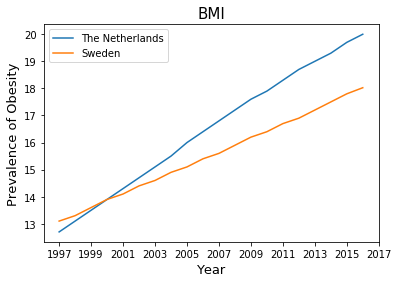

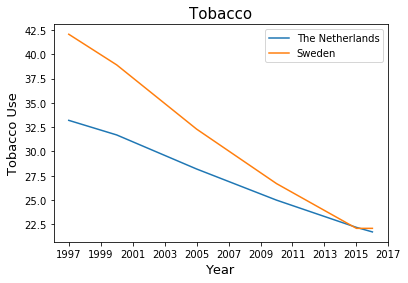

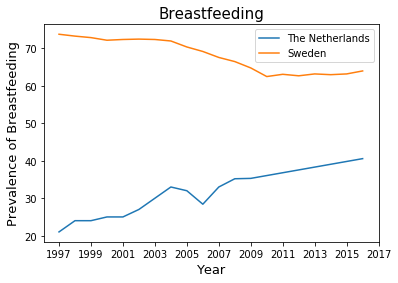

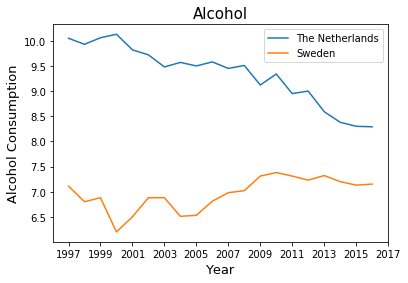

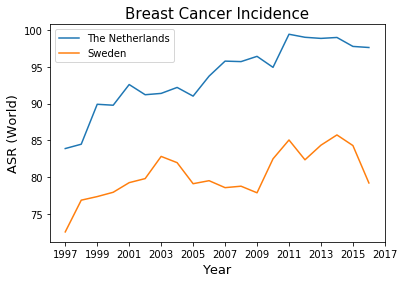

In [243]:
### Plots of all variables are made that can be seen in Appendix C
plt.plot(Regression_ASR_ALL_NL["Year"], Regression_ASR_ALL_NL["BMI Value"])
plt.plot(Regression_ASR_ALL_SW["Year"], Regression_ASR_ALL_SW["BMI Value"])
plt.xlabel('Year', fontsize=13)
plt.ylabel('Prevalence of Obesity', fontsize=13)
plt.title("BMI", fontsize = 15)
plt.xticks(np.arange(min(Regression_ASR_ALL_SW["Year"]), max(Regression_ASR_ALL_SW["Year"])+2, 2.0))
plt.gca().legend(("The Netherlands", "Sweden"))
plt.show()

plt.plot(Regression_ASR_ALL_NL["Year"], Regression_ASR_ALL_NL["Smoking Value"])
plt.plot(Regression_ASR_ALL_SW["Year"], Regression_ASR_ALL_SW["Smoking Value"])
plt.xlabel('Year', fontsize=13)
plt.ylabel('Tobacco Use', fontsize=13)
plt.title("Tobacco", fontsize = 15)
plt.xticks(np.arange(min(Regression_ASR_ALL_SW["Year"]), max(Regression_ASR_ALL_SW["Year"])+2, 2.0))
plt.gca().legend(("The Netherlands", "Sweden"))
plt.show()

plt.plot(Regression_ASR_ALL_NL["Year"], Regression_ASR_ALL_NL["Breastfeeding Value"])
plt.plot(Regression_ASR_ALL_SW["Year"], Regression_ASR_ALL_SW["Breastfeeding Value"])
plt.xlabel('Year', fontsize=13)
plt.ylabel('Prevalence of Breastfeeding', fontsize=13)
plt.title("Breastfeeding", fontsize = 15)
plt.xticks(np.arange(min(Regression_ASR_ALL_SW["Year"]), max(Regression_ASR_ALL_SW["Year"])+2, 2.0))
plt.gca().legend(("The Netherlands", "Sweden"))
plt.show()

plt.plot(Regression_ASR_ALL_NL["Year"], Regression_ASR_ALL_NL["Alcohol Value"])
plt.plot(Regression_ASR_ALL_SW["Year"], Regression_ASR_ALL_SW["Alcohol Value"])
plt.xlabel('Year', fontsize=13)
plt.ylabel('Alcohol Consumption', fontsize=13)
plt.title("Alcohol", fontsize = 15)
plt.xticks(np.arange(min(Regression_ASR_ALL_SW["Year"]), max(Regression_ASR_ALL_SW["Year"])+2, 2.0))
plt.gca().legend(("The Netherlands", "Sweden"))
plt.show()

plt.plot(Regression_ASR_ALL_NL["Year"], Regression_ASR_ALL_NL["ASR (World) Value"])
plt.plot(Regression_ASR_ALL_SW["Year"], Regression_ASR_ALL_SW["ASR (World) Value"])
plt.xlabel('Year', fontsize=13)
plt.ylabel('ASR (World)', fontsize=13)
plt.title("Breast Cancer Incidence", fontsize = 15)
plt.xticks(np.arange(min(Regression_ASR_ALL_SW["Year"]), max(Regression_ASR_ALL_SW["Year"])+2, 2.0))
plt.gca().legend(("The Netherlands", "Sweden"))
plt.show()

In [244]:
#INTERCORRELATIES BMI ALC SM NEDERLAND
R_Coeff_BMI_ALC_NL=scipy.stats.pearsonr(Regression_ASR_ALL_NL["BMI Value"], Regression_ASR_ALL_NL["Alcohol Value"])
R_Coeff_BMI_SM_NL=scipy.stats.pearsonr(Regression_ASR_ALL_NL["BMI Value"], Regression_ASR_ALL_NL["Smoking Value"])
R_Coeff_ALC_SM_NL=scipy.stats.pearsonr(Regression_ASR_ALL_NL["Alcohol Value"], Regression_ASR_ALL_NL["Smoking Value"])

#INTERCORRELATIES BMI ALC SM ZWEDEN
R_Coeff_BMI_ALC_SW=scipy.stats.pearsonr(Regression_ASR_ALL_SW["BMI Value"], Regression_ASR_ALL_SW["Alcohol Value"])
R_Coeff_BMI_SM_SW=scipy.stats.pearsonr(Regression_ASR_ALL_SW["BMI Value"], Regression_ASR_ALL_SW["Smoking Value"])
R_Coeff_ALC_SM_SW=scipy.stats.pearsonr(Regression_ASR_ALL_SW["Alcohol Value"], Regression_ASR_ALL_SW["Smoking Value"])

print("Intercorrelation coefficients Netherlands")
print("BMI - ALC: ", R_Coeff_BMI_ALC_NL)
print("BMI - SM: " , R_Coeff_BMI_SM_NL)
print("ALC - SM: " , R_Coeff_ALC_SM_NL)
print("Intercorrelation coefficients Sweden")
print("BMI - ALC: ", R_Coeff_BMI_ALC_SW)
print("BMI - SM: " , R_Coeff_BMI_SM_SW)
print("ALC - SM: ", R_Coeff_ALC_SM_SW)


Intercorrelation coefficients Netherlands
BMI - ALC:  (-0.942349789539581, 5.413988184275481e-10)
BMI - SM:  (-0.9996851251573278, 2.8859867871796486e-30)
ALC - SM:  (0.9456194207899824, 3.239946719743917e-10)
Intercorrelation coefficients Sweden
BMI - ALC:  (0.6355164934970536, 0.0026015017251169266)
BMI - SM:  (-0.9954706880616013, 7.494574296970368e-20)
ALC - SM:  (-0.6450159654634157, 0.0021350597055114842)


In [245]:
### importing packages necessary to calculate VIF-values
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  

### Calculation of VIF-Values
X = add_constant(Regression_ASR_ALL_NL[["BMI Value", "Smoking Value", "Alcohol Value"]])  
ds=pd.Series([variance_inflation_factor(X.values, i)   
               for i in range(X.shape[1])],   
              index=X.columns)  
print(ds)

X = add_constant(Regression_ASR_ALL_SW[["BMI Value", "Smoking Value", "Alcohol Value"]])  
ds=pd.Series([variance_inflation_factor(X.values, i)   
               for i in range(X.shape[1])],   
              index=X.columns)  
print(ds)

### Checking if VIF<10 after exclusion of Smoking Value
X = add_constant(Regression_ASR_ALL_NL[["BMI Value", "Alcohol Value"]])  
ds=pd.Series([variance_inflation_factor(X.values, i)   
               for i in range(X.shape[1])],   
              index=X.columns)  
print(ds)
X = add_constant(Regression_ASR_ALL_SW[["BMI Value", "Alcohol Value"]])  
ds=pd.Series([variance_inflation_factor(X.values, i)   
               for i in range(X.shape[1])],   
              index=X.columns)  
print(ds)



const            392995.803970
BMI Value          1830.915923
Smoking Value      1937.737839
Alcohol Value        10.895979
dtype: float64
const            27854.273895
BMI Value          111.557204
Smoking Value      113.881058
Alcohol Value        1.726618
dtype: float64
const            4867.304178
BMI Value           8.930415
Alcohol Value       8.930415
dtype: float64
const            501.859556
BMI Value          1.677518
Alcohol Value      1.677518
dtype: float64


Regression analysis results NL
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     39.71
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           1.22e-07
Time:                        15:48:35   Log-Likelihood:                -7.0418
No. Observations:                  20   AIC:                             22.08
Df Residuals:                      16   BIC:                             26.07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.171e-15

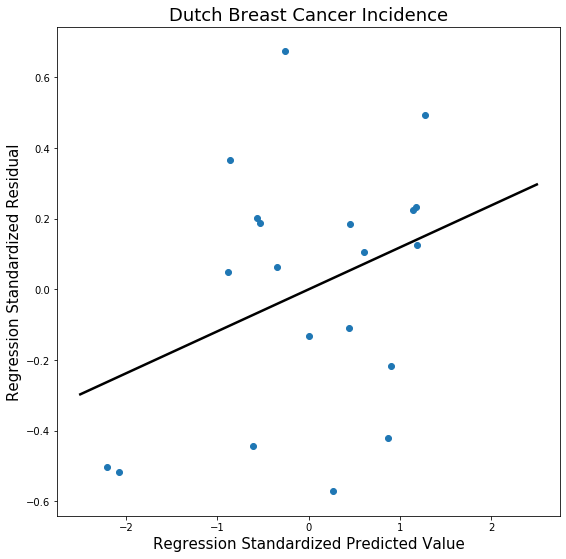

C:\Users\emile\anaconda3\lib\site-packages\ipykernel_launcher.py:82: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



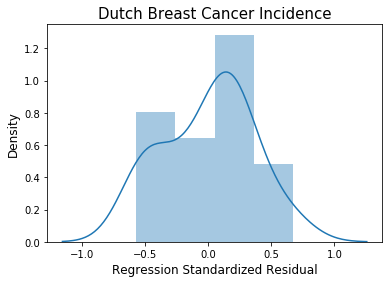

C:\Users\emile\anaconda3\lib\site-packages\ipykernel_launcher.py:111: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



Regression analysis results SW
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     5.579
Date:                Wed, 28 Jun 2023   Prob (F-statistic):            0.00817
Time:                        15:48:35   Log-Likelihood:                -21.219
No. Observations:                  20   AIC:                             50.44
Df Residuals:                      16   BIC:                             54.42
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.116e-15

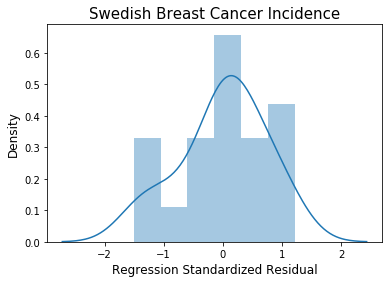

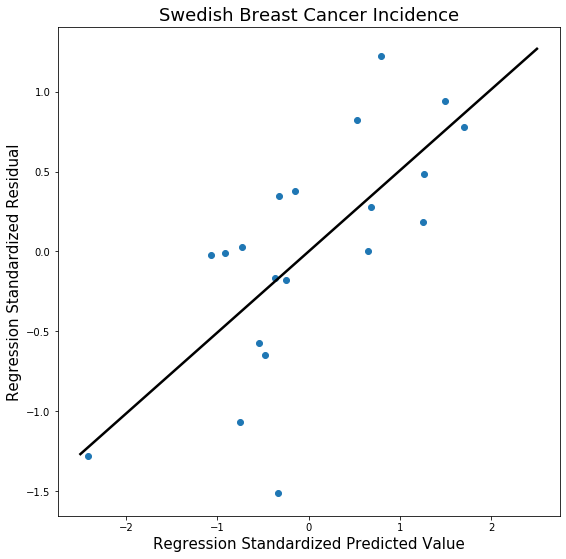

In [246]:
### Importing all necessary packages for calculating and plotting the Residuals
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import seaborn as sns


### Function for regression analysis, from which the model solutions and residuals can be saved.
Residuals = []

def regression_analysis(x,y):
    global Residuals
    global model
    x = np.array(x)
    y = np.array(y)
    
    # Add a constant term to the input data
    x = sm.add_constant(x)

    # Fit the OLS model to the input data
    model = sm.OLS(y, x, missing='drop').fit()
    Residuals = model.resid
    # Print the model summary
    print(model.summary())  


### Only selecting variables for standardization
ALL_NL = Regression_ASR_ALL_NL[["ASR (World) Value", "BMI Value","Alcohol Value",'Breastfeeding Value', "Smoking Value"]]
ALL_SW = Regression_ASR_ALL_SW[["ASR (World) Value", "BMI Value", "Alcohol Value", "Breastfeeding Value", "Smoking Value"]]

### Standardization of Dutch  variables
scaler= StandardScaler()
Z_ALL_NL = scaler.fit_transform(ALL_NL)
Z_ALL_NL_COND= pd.DataFrame(Z_ALL_NL, columns=["ASR (World) Value", "BMI Value","Alcohol Value",'Breastfeeding Value', 'Smoking Value'])
### Deletion of Smoking Value
Z_ALL_NL = np.delete(Z_ALL_NL, 4, 1)
Z_ALL_NL = pd.DataFrame(Z_ALL_NL, columns=["ASR (World) Value", "BMI Value","Alcohol Value",'Breastfeeding Value'])

### Standardization of Swedish Variables
Z_ALL_SW = scaler.fit_transform(ALL_SW)
Z_ALL_SW_COND= pd.DataFrame(Z_ALL_SW, columns=["ASR (World) Value", "BMI Value","Alcohol Value",'Breastfeeding Value', 'Smoking Value'])
### Deletion of Smoking Value
Z_ALL_SW = np.delete(Z_ALL_SW, 4, 1)
Z_ALL_SW = pd.DataFrame(Z_ALL_SW, columns=["ASR (World) Value", "BMI Value","Alcohol Value",'Breastfeeding Value'])

### Splitting the dependent variables from the independent variables
ZY_NL = Z_ALL_NL.iloc[:,0]
ZY_SW = Z_ALL_SW.iloc[:,0]

### Smoking Value is not included in analysis
ZX_ALL_SW = Z_ALL_SW[["BMI Value","Alcohol Value",'Breastfeeding Value']]
ZX_ALL_NL = Z_ALL_NL[["BMI Value","Alcohol Value",'Breastfeeding Value']]

### Performing first Dutch Regression analysis    
print("Regression analysis results NL")    
regression_analysis(ZX_ALL_NL, ZY_NL)

### Performing second Dutch Regression analysis
ZX_ALL_2_NL =  ZX_ALL_NL.drop(columns = ["Breastfeeding Value"])### DELETION Breastfeeding
regression_analysis(ZX_ALL_2_NL, ZY_NL)

### Saving all parameters from the Dutch model necessary for Z-test and tests of preconditions  
Coefficients_NL = model.params.copy()
Coefficient_NL = Coefficients_NL[1]
Coefficients_std_error_NL = model.bse
Coefficient_std_error_NL = Coefficients_std_error_NL[1]
Residuals_NL = Residuals
Residuals_NL = pd.DataFrame(Residuals_NL, columns = ["Residual"])
ZY_NL = pd.DataFrame(ZY_NL, columns = ["ASR (World) Value"])

### Plotting Dutch Residual plot
fig, ax = plt.subplots(figsize = (9, 9))
ax.scatter(ZY_NL["ASR (World) Value"], Residuals_NL["Residual"])
b, a = np.polyfit(ZY_NL["ASR (World) Value"], Residuals_NL["Residual"], deg=1)
xseq = np.linspace(-2.5, 2.5, num=10)
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)
plt.title("Dutch Breast Cancer Incidence", fontsize = 18)
plt.ylabel("Regression Standardized Residual", fontsize = 15)
plt.xlabel("Regression Standardized Predicted Value", fontsize = 15)
plt.show()

### Plotting Dutch density plot
sns.distplot(Residuals_NL)
plt.title("Dutch Breast Cancer Incidence", fontsize = 15)
plt.xlabel("Regression Standardized Residual", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
plt.show()

### Performing first Swedish regression analysis
print("Regression analysis results SW")    
regression_analysis(ZX_ALL_SW, ZY_SW)

### Performing second Swedish regression analysis
ZX_ALL_2_SW = ZX_ALL_SW.drop(columns = ["Breastfeeding Value"]) ### DELETION BREASTFEEDING
regression_analysis(ZX_ALL_2_SW, ZY_SW)

### Performing third Swedish regression analysis
ZX_ALL_3_SW = ZX_ALL_2_SW.drop(columns = ["Alcohol Value"]) ### DELETION ALCOHOL
results = regression_analysis(ZX_ALL_3_SW, ZY_SW)
print(model.pvalues)

### Saving all parameters from the Swedish model necessary for Z-test and tests of preconditions  
Coefficients_SW = model.params.copy()
Coefficient_SW = Coefficients_SW[1]
Coefficients_std_error_SW = model.bse
Coefficient_std_error_SW = Coefficients_std_error_SW[1]
Residuals_SW = Residuals
Residuals_SW = pd.DataFrame(Residuals_SW, columns = ["Residual"])
ZY_SW = pd.DataFrame(ZY_SW, columns = ["ASR (World) Value"])

### Plotting Swedish density plot
sns.distplot(Residuals_SW)
plt.title("Swedish Breast Cancer Incidence", fontsize = 15)
plt.xlabel("Regression Standardized Residual", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
plt.show()

### Plotting Swedish Residual plot
fig, ax = plt.subplots(figsize = (9, 9))
ax.scatter(ZY_SW["ASR (World) Value"], Residuals_SW["Residual"])
b, a = np.polyfit(ZY_SW["ASR (World) Value"], Residuals_SW["Residual"], deg=1)
xseq = np.linspace(-2.5, 2.5, num=10)
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)
plt.title("Swedish Breast Cancer Incidence", fontsize = 18)
plt.ylabel("Regression Standardized Residual", fontsize = 15)
plt.xlabel("Regression Standardized Predicted Value", fontsize = 15)
plt.show()









In [247]:
### importing package necessary for Z-test
import math 

### Performing Z-test
Z_score= (Coefficient_NL-Coefficient_SW)/(math.sqrt(math.pow(Coefficient_std_error_NL, 2))+(math.pow(Coefficient_std_error_SW, 2)))
print(Z_score)
print("P-value = ", scipy.stats.norm.sf(Z_score))


2.273178445016603
P-value =  0.011507714345657423
